<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/certificate_decision_tree_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [ ]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label

In [ ]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn import preprocessing                       # นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล: sklearn.preprocessing

label_encoder = preprocessing.LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target')

In [ ]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target)
import numpy as np

features_name = ['face', 'ear', 'brown', 'tongue', 'whisker']
features = data[features_name].to_numpy()
target = data['target'].to_numpy()


In [ ]:
features

array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1]])

In [ ]:
target

array([1, 1, 1, 0, 0, 0])

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข

In [ ]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(features, target)
clf.score(features, target)

1.0

In [ ]:
label_encoder.classes_

array(['cat', 'dog'], dtype=object)

### แสดงต้นไม้ตัดสินใจ (Decision Tree)

[Text(0.6, 0.8333333333333334, 'face <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = cat'),
 Text(0.4, 0.5, 'brown <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = dog'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = cat'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = dog'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = cat'),
 Text(0.7, 0.6666666666666667, '  False')]

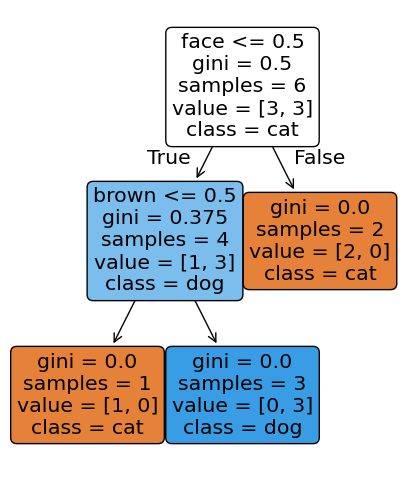

In [ ]:
# นำเข้า Library สำหรับวาดต้นไม้
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree)
# ปรับแต่งกราฟที่ได้ให้สวยงาม
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(5,6))

tree.plot_tree(clf, feature_names=features_name, class_names=label_encoder.classes_, rounded=True, filled=True)


In [ ]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้
tree_result = tree.export_text(clf, feature_names=features_name, class_names=label_encoder.classes_)

print(tree_result)

|--- face <= 0.50
|   |--- brown <= 0.50
|   |   |--- class: cat
|   |--- brown >  0.50
|   |   |--- class: dog
|--- face >  0.50
|   |--- class: cat

